## TDI Project Part 2 - in-depth view of 2016 Medicare Part D Prescriber dataset

This dataset is from the Center for Medicare and Medicaid Services website (https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Part-D-Prescriber.html). The shape of dataset is as follows:

(1131550, 84)

In [11]:
# import modules, read data and create a dict of data
%matplotlib inline
import numpy as np
import pandas as pd
from ipywidgets import interact

data=pd.read_csv('Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2016.csv')


In [12]:
print(data.shape)
data.columns

(1131550, 84)


Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress

In [13]:
data1 = pd.DataFrame()
data_index = pd.DataFrame()
data_calc = pd.DataFrame()
data1 = data.loc[:,['specialty_description', 'total_claim_count']]
data_calc['ratio_agg'] = data.total_day_supply/data.bene_count
data_calc['ratio_day_er_op'] = data.er_opioid_day_supply/data.er_opioid_bene_count
data_calc['ratio_day_op'] = data.opioid_day_supply/data.opioid_bene_count
data_calc['ratio_day_abx'] = data.antibiotic_claim_count/data.antibiotic_bene_count
data_calc['ratio_day_apsy'] = data.antipsych_claim_count_ge65/data.antipsych_bene_count_ge65
data_calc['num_prescribers'] = 1
data1 = pd.concat([data1, data_calc], axis=1)

In [14]:
data1.describe()

,total_claim_count,ratio_agg,ratio_day_er_op,ratio_day_op,ratio_day_abx,ratio_day_apsy,num_prescribers
count,1.131550e+06,999617.000000,21332.000000,441495.000000,590823.000000,40338.000000,1131550.0
mean,1.308800e+03,231.587998,135.858999,48.678325,1.470075,6.259980,1.0
std,3.147395e+03,289.359034,72.853634,58.015491,0.518976,2.947722,0.0
min,1.100000e+01,1.000000,1.028571,1.000000,1.000000,1.000000,1.0
25%,5.400000e+01,27.705882,76.666667,5.533333,1.144928,4.317350,1.0
50%,2.000000e+02,107.475610,126.000000,22.372549,1.322222,5.818182,1.0
75%,1.000000e+03,317.902778,188.236869,77.627513,1.620690,7.625000,1.0
max,3.242090e+05,3311.567797,430.642857,725.480000,28.800000,55.714286,1.0


In [15]:
# There are a total of 223 unique categories
data1.specialty_description.unique().size

223

In [16]:
# Group individual practices by specialty description and sum columns.

data_index = data1.groupby(['specialty_description'], as_index=True).sum()

# overlapping entries identified and consolidated

data_index.loc['Allergy/Immunology'] = data_index.loc['Allergy/Immunology']+ data_index.loc['Allergy/ Immunology']
data_index.drop('Allergy/ Immunology', inplace=True)

data_index.loc['Clinical Cardiatric Electrophysiology'] = data_index.loc['Clinical Cardiatric Electrophysiology']+ data_index.loc['Cardiac Electrophysiology']
data_index.drop('Cardiac Electrophysiology', inplace=True)

data_index.loc['Orthopedic Surgery'] = data_index.loc['Orthopedic Surgery']+ data_index.loc['Orthopaedic Surgery']
data_index.drop('Orthopaedic Surgery', inplace=True)

data_index.loc['Colorectal Surgery (Proctology)'] = data_index.loc['Colorectal Surgery (Proctology)']+ data_index.loc['Colon & Rectal Surgery']
data_index.drop('Colon & Rectal Surgery', inplace=True)

# Normalize per-prescriber value for each of the ratios calculated in previous cell.
data_index['ratio_agg']=data_index['ratio_agg']/data_index['num_prescribers']
data_index['ratio_day_er_op']=data_index['ratio_day_er_op']/data_index['num_prescribers']
data_index['ratio_day_op']=data_index['ratio_day_op']/data_index['num_prescribers']
data_index['ratio_day_abx']=data_index['ratio_day_abx']/data_index['num_prescribers']
data_index['ratio_day_apsy']=data_index['ratio_day_apsy']/data_index['num_prescribers']

In [17]:
# Function used to identify duplicates in specialties and manually consolidate data

import re
a = data_index.index.str.contains('neu', flags=re.IGNORECASE)
data_index.loc[a].head()

,total_claim_count,ratio_agg,ratio_day_er_op,ratio_day_op,ratio_day_abx,ratio_day_apsy,num_prescribers
specialty_description,,,,,,,
Clinical Neuropsychologist,4122.0,133.378693,0.000000,0.000000,0.000000,0.444444,15.0
Neurological Surgery,33958.0,31.399751,0.000000,6.432077,0.037635,0.000000,576.0
Neurology,22280390.0,273.646314,3.916885,30.691743,0.056565,0.638619,13656.0
"Neuromusculoskeletal Medicine, Sports Medicine",13730.0,121.802216,10.763420,30.428219,0.215502,0.113659,59.0
Neuropsychiatry,753691.0,182.001871,1.009370,2.469370,0.013520,0.272834,2323.0


In [18]:
data_index.head()

,total_claim_count,ratio_agg,ratio_day_er_op,ratio_day_op,ratio_day_abx,ratio_day_apsy,num_prescribers
specialty_description,,,,,,,
Acupuncturist,7237.0,64.850262,0.000000,0.350323,0.143676,0.000000,86.0
Addiction Medicine,205317.0,286.767328,16.732671,41.744060,0.218327,0.317555,217.0
Advanced Practice Dental Therapist,106.0,30.190476,0.000000,0.000000,1.589744,0.000000,2.0
Allergy/Immunology,2728386.0,181.699000,0.232146,2.139729,0.831476,0.011768,4016.0
Alzheimer Center (Dementia Center),24.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


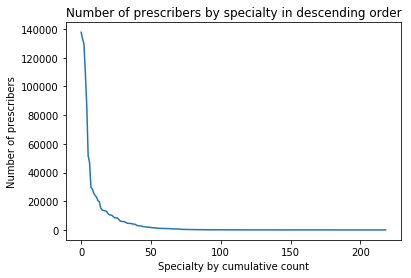

In [19]:
# View distribution of specialties by number of prescribers.
# I used this as a surrogate for the level of prevalence of each specialty.

import matplotlib.pyplot as plt
a = data_index.sort_values(by='num_prescribers', ascending=False).dropna(axis=0).loc[:,['num_prescribers']]
ax = plt.plot(np.arange(len(data_index)),a.values)
plt.xlabel('Specialty by cumulative count')
plt.ylabel('Number of prescribers')
plt.title('Number of prescribers by specialty in descending order')

# We will analyze the top 50 specialties by number of prescribers to exclude esoteric categories (e.g. drivers)
data_index = data_index.sort_values(by='num_prescribers', ascending=False).dropna(axis=0).head(50)

In [20]:
# In this section, I created an interactive code to pull the 20 specialties with highest prescription-to-beneficiary ratio for each drug class.
def f(drug_type):
    top20_data = pd.DataFrame()
    d = {'Extended-Release Opioid':'day_er_op', 'Opioid': 'day_op', 'Antibiotics': 'day_abx', 'Antipsychotic': 'day_apsy', 'Aggregate':'agg'}
    probe = 'ratio_{}'.format(d[drug_type])
    top20_data= data_index.sort_values(by=probe, ascending=False).dropna(axis=0).head(20).loc[:,[probe]]
    print(top20_data)
    
    return

interact(f, drug_type=['Aggregate', 'Extended-Release Opioid','Opioid', 'Antibiotics', 'Antipsychotic']);

interactive(children=(Dropdown(description='drug_type', options=('Aggregate', 'Extended-Release Opioid', 'Opio…

Aggregate result shows that primary care specialties (geriatrics, family medicine, general practice and internal medicine) have the highest ratio of drug prescription to beneficiaries.

Within each drug sub-category, the category-specific specialties rank at the top. However, we still find the primary care specialties within the top 20 list in each drug sub-category. Based on this information, patterns of drug prescription in general practices merit further scrutiny.

Now we look at potential predictors of drug prescription in one of the four primary care specialties (family practice) from our original dataset:

In [21]:
data_family = data.loc[data.specialty_description=='Family Practice']

In [22]:
data_family.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress

In [23]:
data_family.shape

(109334, 84)

In [24]:
# I created a list of predictors for the linear regression.
# The list excludes parameters used to calculate the score (ratio of prescription volume to beneficiaries).
# All parameters based on beneficiary counts are normalized to aggregate bene_count.
# All parameters based on drug cost is normalized to total_drug_cost.
data_family_score = pd.DataFrame()
norm_predictors = pd.DataFrame()
list_predictors = ['brand_claim_count',
       'generic_claim_count','other_claim_count','mapd_claim_count',
       'pdp_claim_count','lis_claim_count','nonlis_claim_count',
       'total_claim_count_ge65','beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_asian_pi_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_nat_ind_count',
       'beneficiary_race_other_count','beneficiary_average_risk_score']
for elem in list_predictors:
    if elem[-11:]=='claim_count':
        norm_predictors[elem] = data_family[elem]/data_family['total_claim_count']
    elif elem[-5:]=='count':
        norm_predictors[elem] = data_family[elem]/data_family['bene_count']
    elif elem[-4:]=='ge65':
        norm_predictors[elem] = data_family[elem]/data_family['total_claim_count']
    else:
        norm_predictors[elem] = data_family[elem]

norm_predictors['score']= data_family.total_day_supply*data_family.total_claim_count/data_family.bene_count
norm_predictors=norm_predictors.dropna(axis=0)

In [25]:
norm_predictors.shape

(1316, 22)

In [26]:
# We will perform linear regression on the indicators to generate a model using our predictors 

from sklearn import linear_model

x = np.array(norm_predictors[list_predictors])
y = np.array(norm_predictors['score'])[:,np.newaxis]
lr_family = linear_model.LinearRegression()
lr_family.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lr_family.coef_

array([[ 2.14253121e+19,  2.14253121e+19,  2.14253121e+19,
        -1.77694309e+20, -1.77694309e+20, -3.49970953e+19,
        -3.49970953e+19,  3.77127326e+06,  1.94996978e+18,
         1.94996978e+18,  1.94996978e+18,  1.94996978e+18,
         2.34087771e+19,  2.34087771e+19, -5.54334945e+17,
        -5.54334945e+17, -5.54334945e+17, -5.54334945e+17,
        -5.54334945e+17, -5.54334945e+17,  7.73157528e+06]])

In [28]:
lr_family.score(x,y)

0.06933289499806228

In [29]:
xhat = lr_family.predict(x)

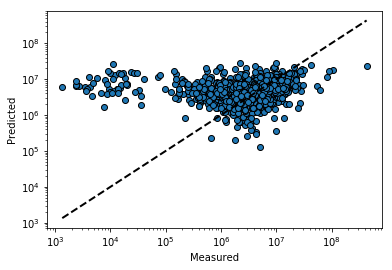

In [30]:
fig, ax = plt.subplots()
ax.scatter(y, xhat, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_xscale("log")
ax.set_yscale("log")

We observe a weak correlation between the predictor variables and the score. As next steps for this project, I will use other modeling techniques to incorporate non-numeric data such as geography and specialties, while adding orthogonal datasets from other sources to further refine the model.